# CSC 593

## Week 9

In [1]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

### Basic Statistics in Python

#### Basic summary statistics


This is not intended to be a thorough introduction to statistics. I'm just demonstrating how to do this work in Python.

In [16]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
spec = iris.groupby('species')
spec.count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [20]:
print(spec.mean())
print(spec.median())
print(spec.std())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.352490     0.379064      0.173664     0.105386
versicolor      0.516171     0.313798      0.469911     0.197753
virginica       0.635880     0.322497      0.551895     0.274650


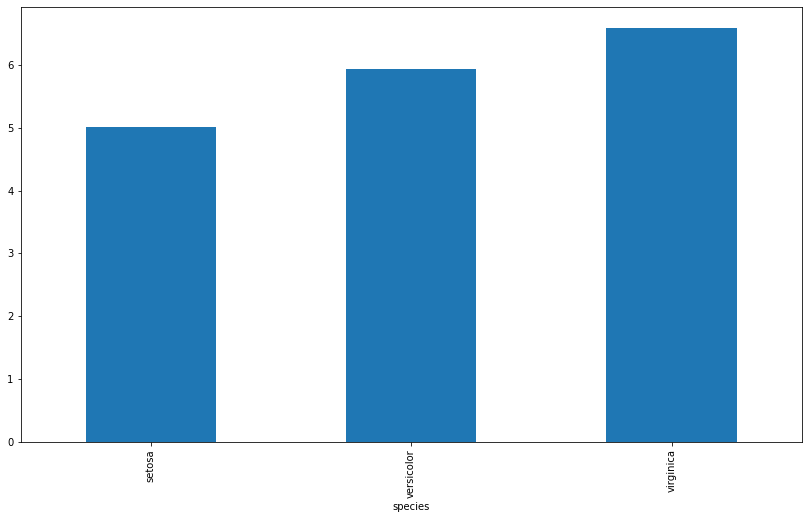

In [5]:
plt.figure(figsize=(14, 8))
spec.mean()['sepal_length'].plot.bar()
plt.show()

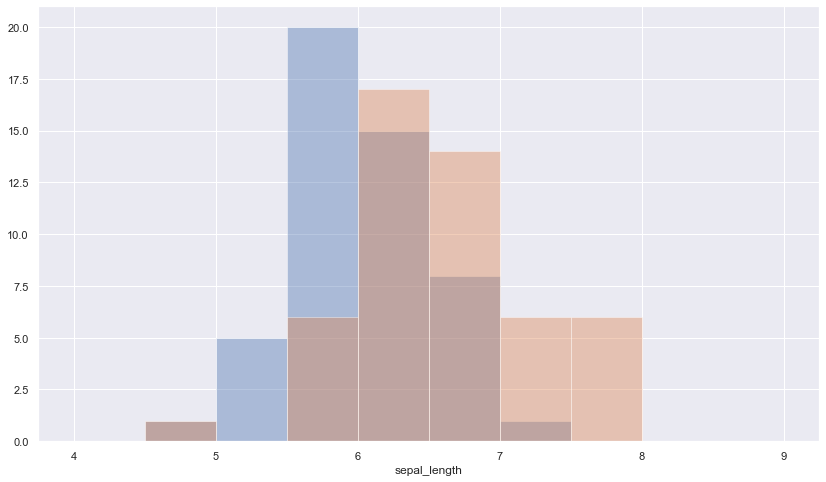

In [6]:
plt.figure(figsize=(14, 8))
sns.set()
sns.distplot(iris[iris.species=='versicolor'].sepal_length, 
             kde=False, hist_kws={'alpha':.4}, bins=np.linspace(4, 9, 11))
sns.distplot(iris[iris.species=='virginica'].sepal_length, 
             kde=False, hist_kws={'alpha':.4}, bins=np.linspace(4, 9, 11))
plt.show()

#### Correlation

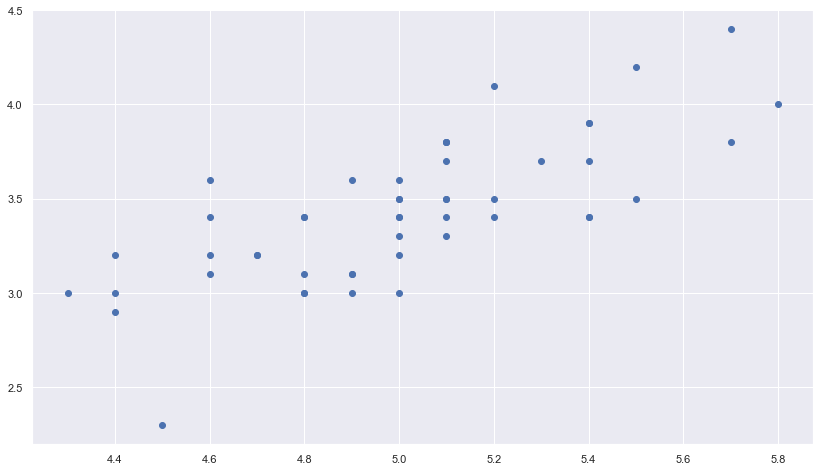

In [7]:
plt.figure(figsize=(14, 8))

setosa = iris[iris.species=='setosa']
plt.plot('sepal_length', 'sepal_width', '.', data=setosa, markersize=12)

In [22]:
corr, pval = stats.pearsonr(setosa['sepal_length'], setosa['sepal_width'])
corr

0.7425466856651597

In [9]:
corr, pval = stats.pearsonr(setosa['sepal_length'], (setosa['sepal_width'] * -1))
corr

-0.7425466856651597

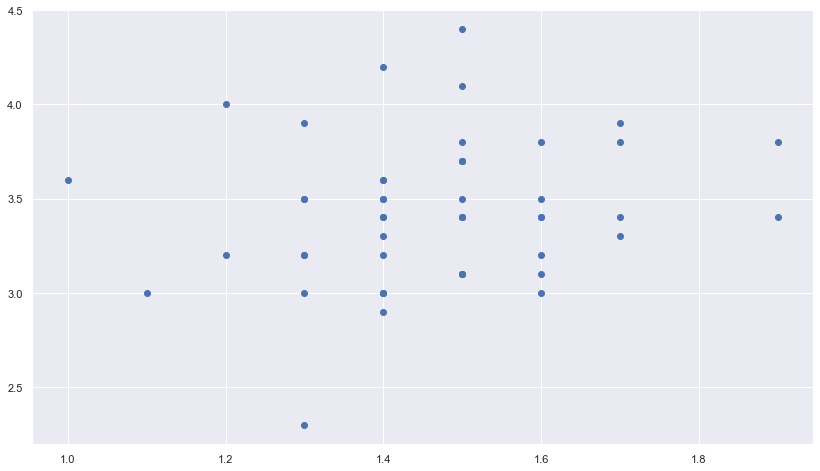

-0.1776999667822707

In [10]:
plt.figure(figsize=(14, 8))

plt.plot('petal_length', 'sepal_width', '.', data=setosa, markersize=12)
plt.show()
corr, pval = stats.pearsonr(setosa['petal_length'], (setosa['sepal_width'] * -1))
corr

#### Hypothesis testing

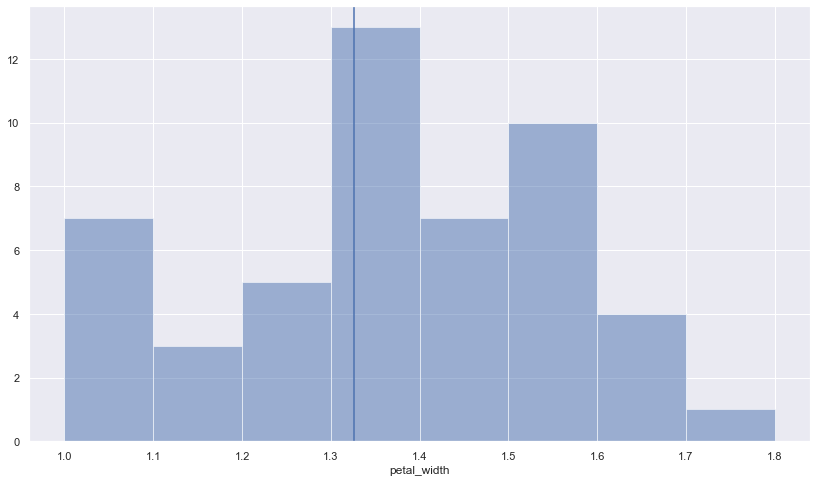

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64
sepal_length    0.516171
sepal_width     0.313798
petal_length    0.469911
petal_width     0.197753
dtype: float64


In [11]:
vers = iris[iris.species=='versicolor']
plt.figure(figsize=(14, 8))

sns.distplot(vers.petal_width, 
             kde=False, hist_kws={'alpha':.5}, bins=np.linspace(1, 1.8, 9))
plt.axvline(vers.petal_width.mean())
plt.show()
print(vers.mean())
print(vers.std())

**Question:** Is it possible *versicolor*'s mean petal width is actually 1.25?

We perform a one-sample t-test using SciPy's stats module:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

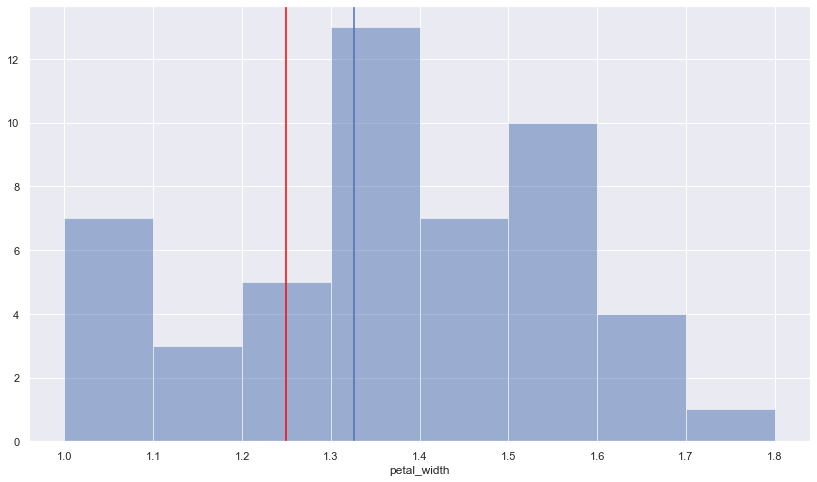

In [12]:
target = 1.25

vers = iris[iris.species=='versicolor']
plt.figure(figsize=(14, 8))

sns.distplot(vers.petal_width, 
             kde=False, hist_kws={'alpha':.5}, bins=np.linspace(1, 1.8, 9))
plt.axvline(vers.petal_width.mean())

plt.axvline(target, color='red')
plt.show()

**Null Hypothesis:** The population mean of *versicolor*'s petal width is =< 1.25.  
**Alternative Hypothesis:** The population mean of *versicolor*'s petal width is =< 1.25.

In [13]:
#There aren't any NaN's in the iris data. if there were, we might need the `nan_policy` argument.
tstat, pval = stats.ttest_1samp(vers.petal_width, target)
print(pval)

#But this is a 1-sided test.
print(pval/2)

0.009065994376871538
0.004532997188435769


With a (typical) significance level of 95%, we can reject the null hypothesis. We can be fairly confident that the mean petal width is greater than 1.25.

##### Two-sided tests

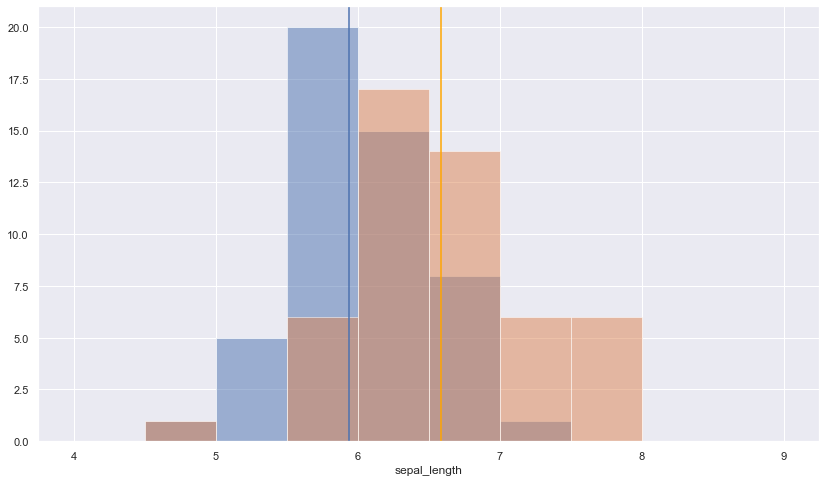

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.352490     0.379064      0.173664     0.105386
versicolor      0.516171     0.313798      0.469911     0.197753
virginica       0.635880     0.322497      0.551895     0.274650


In [14]:
plt.figure(figsize=(14, 8))
virg = iris[iris.species=='virginica']
sns.distplot(vers.sepal_length, 
             kde=False, hist_kws={'alpha':.5}, bins=np.linspace(4, 9, 11))
plt.axvline(vers.sepal_length.mean())
sns.distplot(virg.sepal_length, 
             kde=False, hist_kws={'alpha':.5}, bins=np.linspace(4, 9, 11))
plt.axvline(virg.sepal_length.mean(), color='orange')
plt.show()
print(spec.mean())
print(spec.std())

**Question:** Is it possible *versicolor* and *virginica* have the same mean sepal length?

We do a 2-sided t-test with SciPy: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

**Null Hypothesis:** The population means of *versicolor* and *virginica* sepal length are the same.  
**Alternative Hypothesis:** These two species have different mean sepal lengths.

In [15]:
tstat, pval = stats.ttest_ind(virg.sepal_length, vers.sepal_length)
print(pval)

1.7248563024547942e-07
